# Tesseract

## Instalação:

https://tesseract-ocr.github.io/tessdoc/Home.html

### Linux

* sudo apt install tesseract-ocr
* sudo apt install libtesseract-dev


### Funções:

1. **get_tesseract_version** Retorna a versão instalada do Tesseract.
2. **image_to_string Returns** O resultado do Tesseract OCR em uma string que a imagem contém.
3. **image_to_boxes** Retorna resultado contendo caracteres reconhecidos e seus boxes
4. **image_to_data** Retorna as palavras encontras na imagem delitimadas por boxes
5. **image_to_osd Returns** resultado contendo informações sobre orientação e detecção de script.
6. **run_and_get_output** Retorna a saída bruta do Tesseract OCR. Dá um pouco mais de controle sobre os parâmetros enviados ao tesseract.

### Parametros:

image_to_data(image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0, pandas_config=None)

**image Object or String** - Imagem. É preciso converter para RGB.
**lang String** - Lingua do Tesseract deverá reconhecer. Defaults é eng. É possível multiplas linguas: lang='eng+fra'
**config String** - Qualquer custom adicional configuração: config='--psm 6'
**nice Integer** - modifica a prioridade do processador para a execução do Tesseract. Não suportado no Windows. Nice ajusta a gentileza de processos do tipo unix.
**output_type** Atributo de classe - especifica o tipo de saída, o padrão é string. Para obter a lista completa de todos os tipos suportados, verifique a definição de classe pytesseract.Output.
**timeout Integer or Float** - duração em segundos para o processamento do OCR, após o qual o pytesseract será encerrado e aumentará o RuntimeError.
**pandas_config Dict** - somente para o tipo Output.DATAFRAME. Dicionário com argumentos personalizados para pandas.read_csv. Permite personalizar a saída de image_to_data.




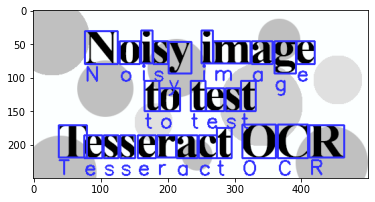

In [17]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

path = os.getcwd()
 
#Windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
tessdata_dir_config = f'--tessdata-dir "C:\\Program Files (x86)\\Tesseract-OCR\\tessdata"'
 
img = cv2.imread('teste_tesseract.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hImg, wImg,_ = img.shape

boxes = pytesseract.image_to_boxes(img, lang='eng', config=tessdata_dir_config)

'''
A função image_to_boxes do tesseract funciona encontrando 

'''

for b in boxes.splitlines():
    #print(b)
    b = b.split(' ')
    #print(b)
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)
    
    
plt.imshow(img)
plt.show()


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	500	250	-1	
2	1	1	0	0	0	38	30	426	190	-1	
3	1	1	1	0	0	38	30	426	190	-1	
4	1	1	1	1	0	77	30	343	64	-1	
5	1	1	1	1	1	77	30	343	64	75	Noisyimage
4	1	1	1	2	0	166	105	166	45	-1	
5	1	1	1	2	1	166	105	53	45	95	to
5	1	1	1	2	2	235	105	97	45	96	test
4	1	1	1	3	0	38	170	426	50	-1	
5	1	1	1	3	1	38	171	258	49	94	Tesseract
5	1	1	1	3	2	312	170	152	50	96	OCR


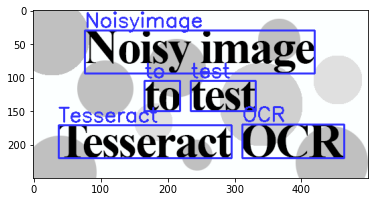

In [19]:
import cv2
import pytesseract
 
#Windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
tessdata_dir_config = f'--tessdata-dir "C:\\Program Files (x86)\\Tesseract-OCR\\tessdata"'
 
img = cv2.imread('teste_tesseract.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
#[   0          1           2           3           4          5         6       7       8        9        10       11 ]
#['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
boxes = pytesseract.image_to_data(img, lang="eng", config=tessdata_dir_config)
for a,b in enumerate(boxes.splitlines()):
        print(b)
        if a!=0:
            b = b.split()
            if len(b)==12:
                x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)
                cv2.rectangle(img, (x,y), (x+w, y+h), (50, 50, 255), 2)

plt.imshow(img)
plt.show()